## Importing Libraries and Data

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

In [44]:
pd.set_option('display.max_columns', None)

dataset = pd.read_csv('data.csv')
print(dataset.shape)
dataset.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [45]:
## The only unique value in the last column is 'NaN'.
print(dataset['Unnamed: 32'].unique())

dataset['Unnamed: 32'].isna().sum()

[nan]


569

As we can see, the last column " **Unnamed: 32** " includes NaN only. So, I will not use it for my classification problem.<br>
And the first column " **id** " includes the ID number for the patient. So, I will not use it too.

#### The first thing to do is to remove these unnecessary columns.

In [46]:
dataset = dataset.drop(['id', 'Unnamed: 32'], axis=1)
print(dataset.shape)
dataset.head()

(569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Check the columns' data types

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

using **dataset.info()**, we see that all the columns have the float64 type, except the first column which is our target.

In [48]:
## There is no missing values..
dataset.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Splitting the dataset into features and target

In [49]:
## The features
x = dataset.drop('diagnosis', axis=1)
print(x.shape)
x.head()

(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
## The target variable
y = dataset['diagnosis']
print(y.shape)
y

(569,)


0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

## Data Preparation

#### Feature Scaling (Standardization)

In [51]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

In [52]:
scaled_data = pd.DataFrame(scaled_data, columns=x.columns)
scaled_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


#### Features' names

In [53]:
print(x.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


As we can see, there are **10** main features, for each one, the mean, standard error, and "worst" or largest (mean of the three largest values) were computed.<br>
So, we'll divide the features into three parts accroding to their category.

In [54]:
features_mean = scaled_data.iloc[:, :10]
print(features_mean.shape)
features_mean.head()

(569, 10)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450


In [55]:
features_se = scaled_data.iloc[:, 10:20]
print(features_se.shape)
features_se.head()

(569, 10)


,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083
1,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444
2,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559
3,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511
4,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328


In [56]:
features_worst = scaled_data.iloc[:, 20:30]
print(features_worst.shape)
features_worst.head()

(569, 10)


,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## Data Visualization

#### Comparing the distributions of Benign and Malignant for all features

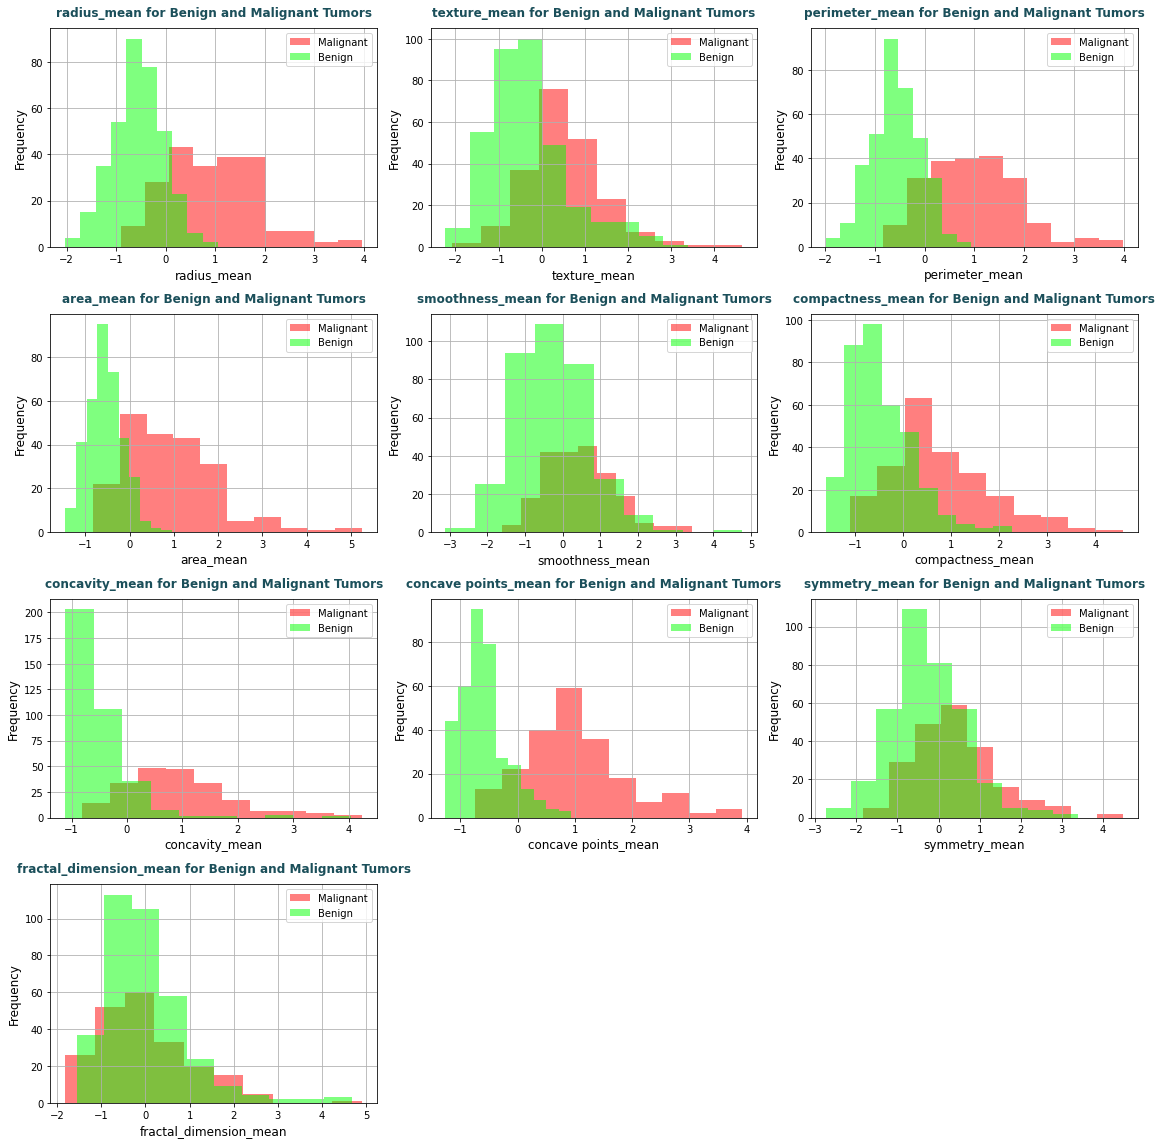

In [57]:
##---------------- features_mean --------------------##

plt.figure(figsize=(16, 16))

for i in range(10):
    ax = plt.subplot(4, 3, i+1)
    plt.hist(features_mean[y == "M"][features_mean.columns[i]], fc = (1,0,0,0.5), label = "Malignant")
    plt.hist(features_mean[y == "B"][features_mean.columns[i]], fc = (0,1,0,0.5), label = "Benign")
    
    plt.title(f'{features_mean.columns[i]} for Benign and Malignant Tumors', pad=12,
              fontdict={
                  'fontweight':'bold',
                  'fontsize':12,
                  'color':'#1b4f5a'
              })
    plt.xlabel(features_mean.columns[i], fontdict={'fontsize':12})
    plt.ylabel('Frequency', fontdict={'fontsize':12})
    
    plt.legend()
    plt.tight_layout()
    plt.grid(True)

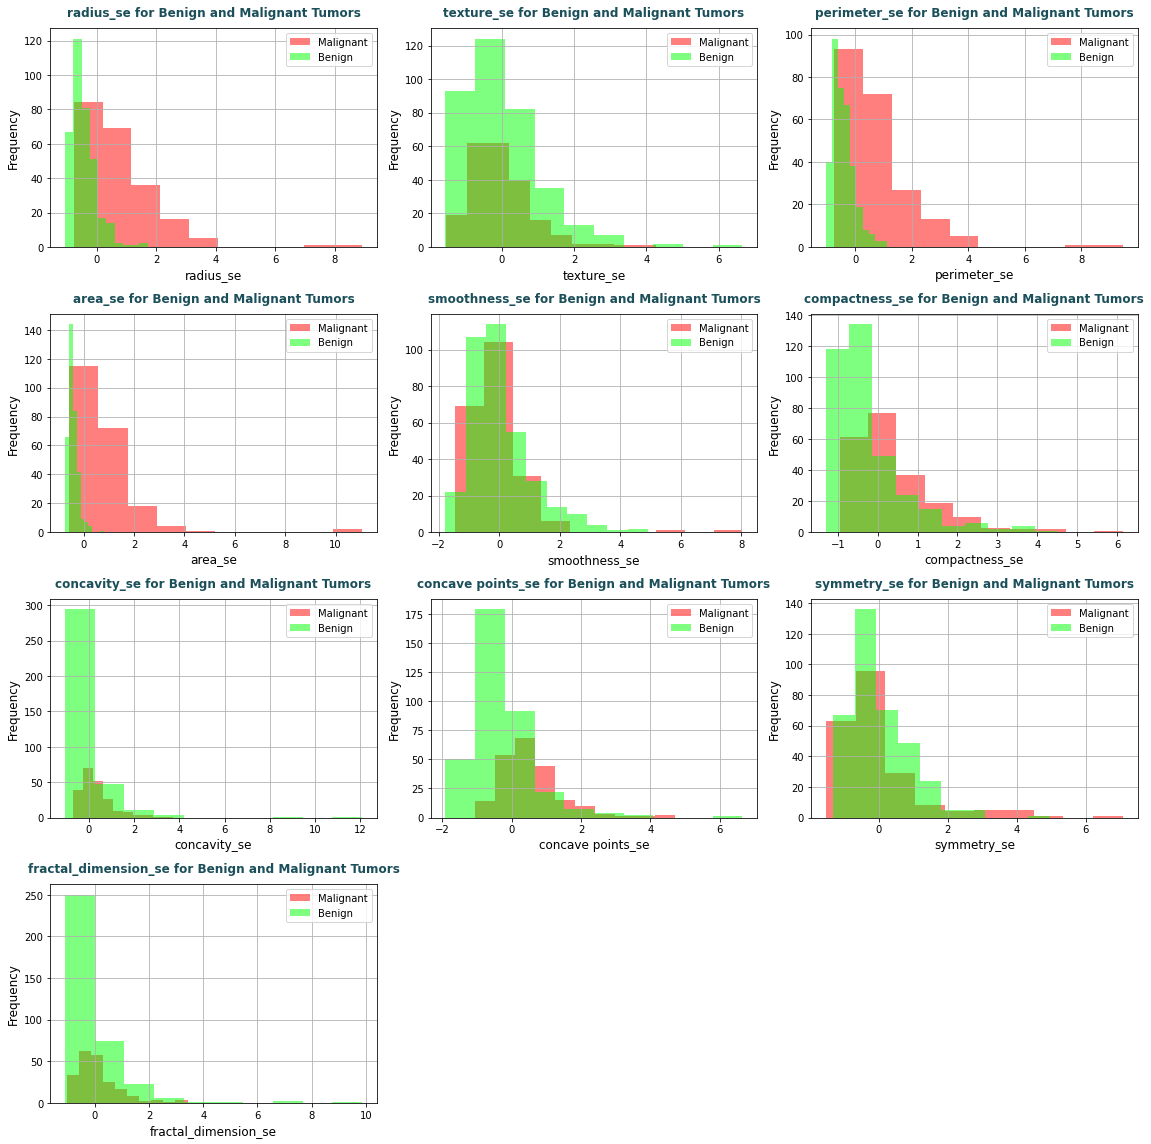

In [58]:
##------------------ features_se --------------------##

plt.figure(figsize=(16, 16))
for i in range(10):
    ax = plt.subplot(4, 3, i+1)
    plt.hist(features_se[y == "M"][features_se.columns[i]], fc = (1,0,0,0.5), label = "Malignant")
    plt.hist(features_se[y == "B"][features_se.columns[i]], fc = (0,1,0,0.5), label = "Benign")
    
    plt.title(f'{features_se.columns[i]} for Benign and Malignant Tumors', pad=12,
              fontdict={
                  'fontweight':'bold',
                  'fontsize':12,
                  'color':'#1b4f5a'
              })
    plt.xlabel(features_se.columns[i], fontdict={'fontsize':12})
    plt.ylabel('Frequency', fontdict={'fontsize':12})
    
    plt.legend()
    plt.tight_layout()
    plt.grid(True)

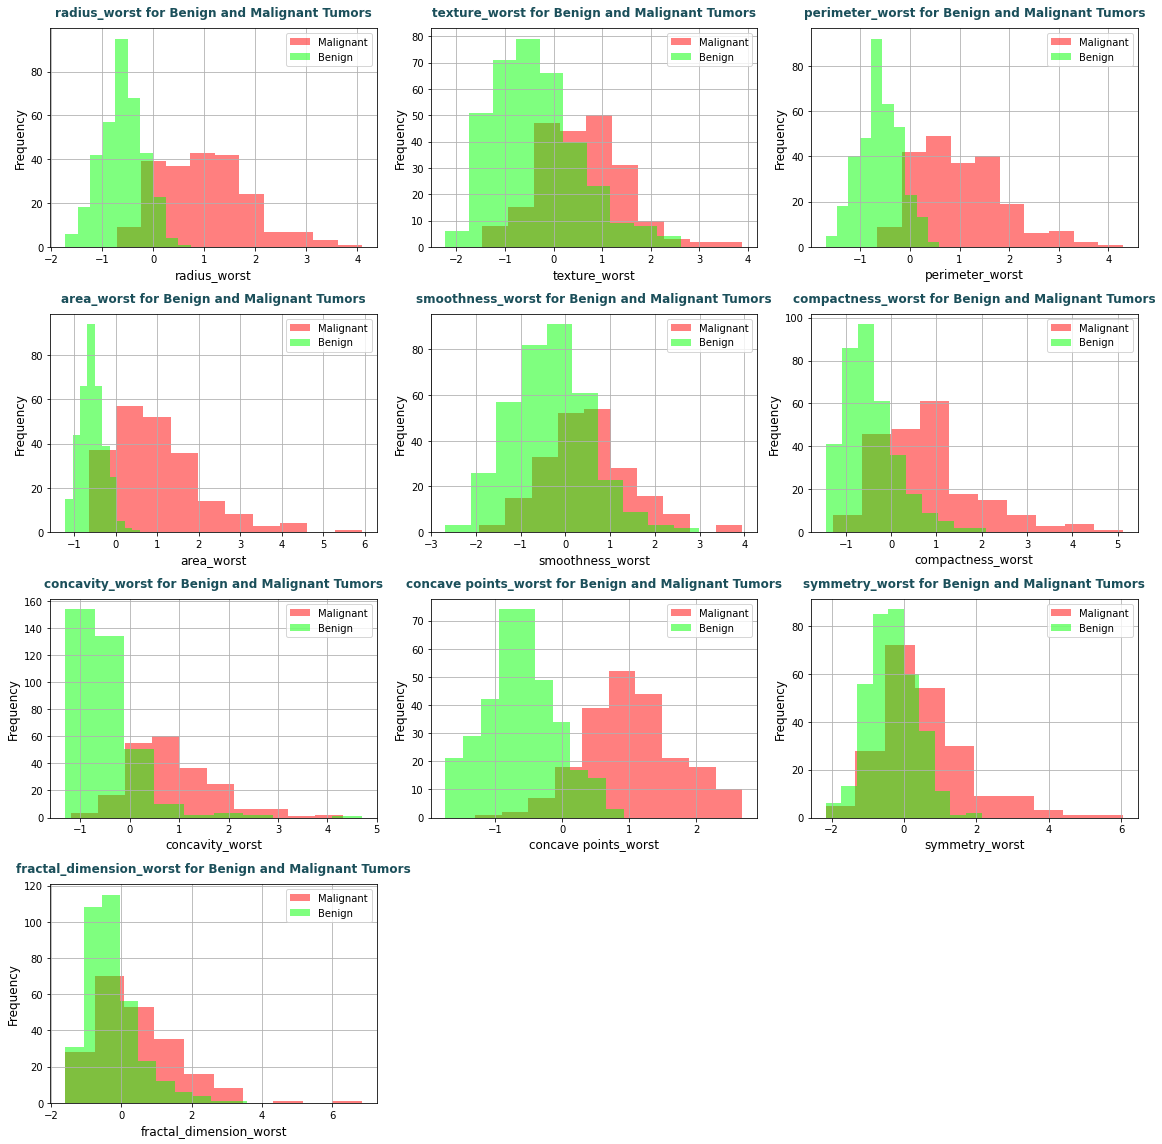

In [59]:
##------------------ features_worst --------------------##

plt.figure(figsize=(16, 16))
for i in range(10):
    ax = plt.subplot(4, 3, i+1)
    plt.hist(features_worst[y == "M"][features_worst.columns[i]], fc = (1,0,0,0.5), label = "Malignant")
    plt.hist(features_worst[y == "B"][features_worst.columns[i]], fc = (0,1,0,0.5), label = "Benign")
    
    plt.title(f'{features_worst.columns[i]} for Benign and Malignant Tumors', pad=12,
              fontdict={
                  'fontweight':'bold',
                  'fontsize':12,
                  'color':'#1b4f5a'
              })
    plt.xlabel(features_worst.columns[i], fontdict={'fontsize':12})
    plt.ylabel('Frequency', fontdict={'fontsize':12})
    
    plt.legend()
    plt.tight_layout()
    plt.grid(True)

Explain the previous graphs by taking one of them as an example

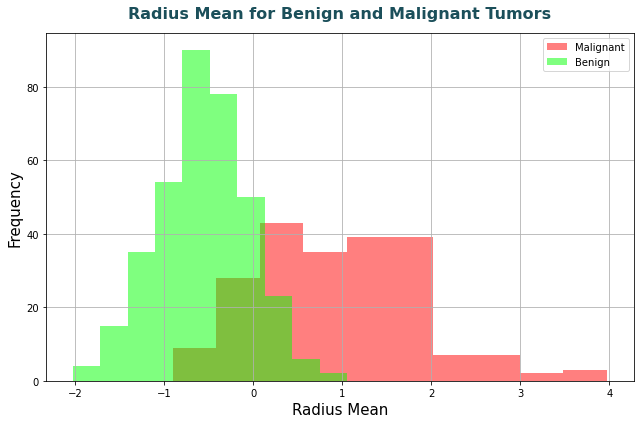

In [60]:
plt.figure(figsize=(9,6))

plt.hist(scaled_data[y == "M"]["radius_mean"], fc = (1,0,0,0.5), label = "Malignant")
plt.hist(scaled_data[y == "B"]["radius_mean"], fc = (0,1,0,0.5), label = "Benign")

plt.title("Radius Mean for Benign and Malignant Tumors", pad=15,
          fontdict={
              'fontweight':'bold',
              'fontsize':16,
              'color':'#1b4f5a'
          })
plt.xlabel("Radius Mean", fontdict={'fontsize':15})
plt.ylabel("Frequency", fontdict={'fontsize':15})

plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

By looking at the previous histogram graph, we can see that:
- The mean of radius_mean of Malignant tumors is bigger than the mean of radius_mean of Bening tumors.
- The values in the histogram for Malignant are much more spread out compared to the values for Bening, which tells us that there is much greater dispersion in the radius mean for patients who are Malignant.

#### Displaying the frequency distribution for our target variable

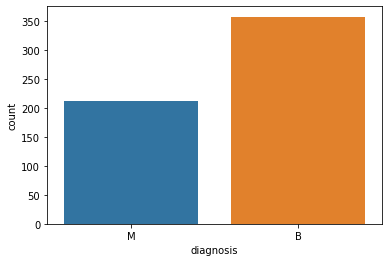

In [61]:
sns.countplot(y)
plt.show()

## Feature Selection

In this feature selection step, I'll select the right features to train the models on with two methods:
- Feature selection with correlation 
- Recursive feature elimination with cross validation (RFECV)

### 1) Feature selection with correlation
I will observe all correlations between features, and drop the highly-correlated ones.

<AxesSubplot:>

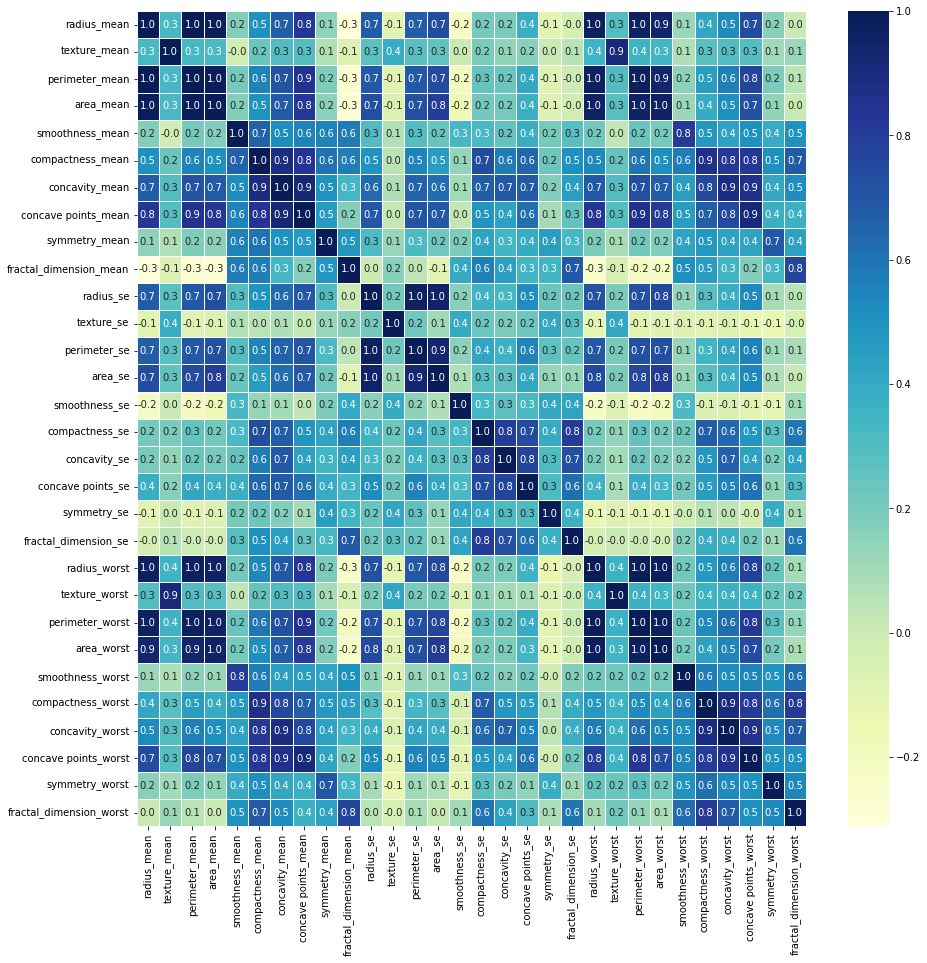

In [62]:
##------------------- Plotting the heat map ------------------##

f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(scaled_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu")

As we can see from the previous heatmap:
- The featurs **radius_mean**, **perimeter_mean**, and **area_mean** are highely-correlated with each other. So, I'll use only the **area_mean** feature.<br>
- The features **radius_worst**, **perimeter_worst**, and **area_worst** are highely-correlated with each other. So, I'll use only the **area_worst** feature.<br>
- The features **texture_mean** and **texture_worst** are highely-correlated with each other. So, I'll use only the **texture_mean** feature.<br>
- The features **area_worst** and **area_mean** are highely-correlated with each other. So, I'll use only the **area_mean** feature.<br>
- The featurs **compactness_mean**, **concavity_mean**, and **concave points_mean** are highely-correlated with each other. So, I'll use only the **concavity_mean** feature.<br>
- The featurs **radius_se**, **perimeter_se**, and **area_se** are highely-correlated with each other. So, I'll use only the **area_se** feature.<br>
- The featurs **compactness_se**, **concavity_se**, and **concave points_se** are highely-correlated with each other. So, I'll use only the **concavity_se** feature.<br>
- The featurs **compactness_worst**, **concavity_worst**, and **concave points_worst** are highely-correlated with each other. So, I'll use only the **concavity_worst** feature.<br>
- The features **concavity_mean** and **concavity_worst** are highely-correlated with each other. So, I'll use only the **concavity_mean** feature.<br>

In [63]:
dropped_features = ['radius_mean', 'perimeter_mean', 'radius_worst', 'perimeter_worst', 'texture_worst',
                    'area_worst', 'compactness_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
                    'compactness_se', 'concave points_se', 'compactness_worst', 'concave points_worst', 'concavity_worst']

In [64]:
new_data = scaled_data.drop(dropped_features, axis=1)
print(new_data.shape)
new_data.head()

(569, 15)


,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,-2.073335,0.984375,1.568466,2.652874,2.217515,2.255747,-0.565265,2.487578,-0.214002,0.724026,1.148757,0.907083,1.307686,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.023846,0.001392,-0.868652,-0.876244,0.742402,-0.605351,-0.440780,-0.805450,-0.099444,-0.375612,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.363478,0.939685,-0.398008,-0.780083,1.181336,-0.297005,0.213076,0.237036,0.293559,0.527407,1.152255,0.201391
3,0.253732,-0.764464,3.283553,1.915897,2.867383,4.910919,-0.110409,-0.288378,0.689702,0.819518,4.732680,2.047511,3.394275,6.046041,4.935010
4,-1.151816,1.826229,0.280372,1.371011,-0.009560,-0.562450,-0.790244,1.190357,1.483067,0.828471,-0.361092,0.499328,0.220556,-0.868353,-0.397100


<AxesSubplot:>

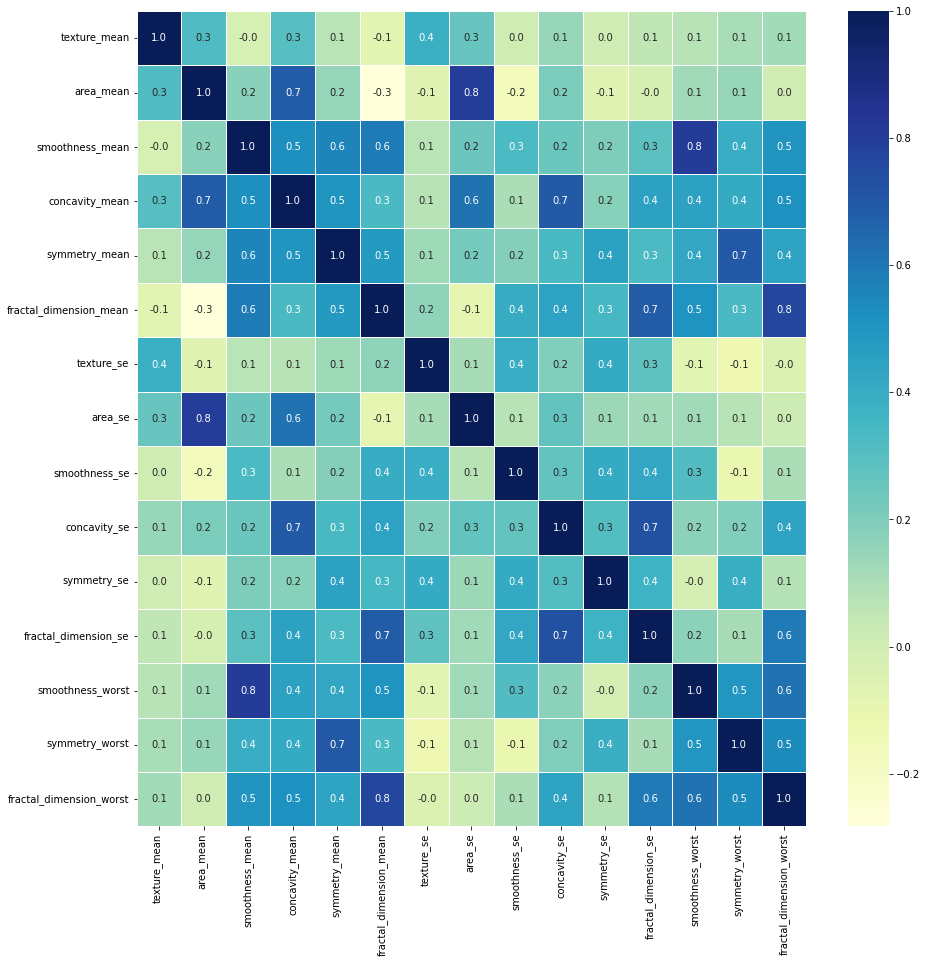

In [65]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(new_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu")

from the above heatmap, there is no feature with a correlation of 0.9 or more with any other feature.

### 2) Recursive feature elimination with cross validation (RFECV)
I'll apply this method with the modeling step (next step).

## Modeling and Evaluation

In [66]:
y = y.map({'M':1, 'B':0})

In [67]:
x_train, x_test, y_train, y_test = train_test_split(new_data, y, test_size=0.25)

print(f'Number of training examples: {x_train.shape[0]}')
print(f'Number of testing examples: {x_test.shape[0]}')
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

Number of training examples: 426
Number of testing examples: 143
x_train shape: (426, 15)
y_train shape: (426,)
x_test shape: (143, 15)
y_test shape: (143,)


### Random Forest Classifier

In [68]:
RF_classifier = RandomForestClassifier()

## RFECV to select the number of features
RF_rfecv = RFECV(estimator=RF_classifier, cv=5, scoring='accuracy')
RF_rfecv = RF_rfecv.fit(x_train, y_train)

print('Optimal number of features :', RF_rfecv.n_features_)
print('Best features :', x_train.columns[RF_rfecv.support_])

Optimal number of features : 10
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'area_se', 'concavity_se', 'fractal_dimension_se', 'smoothness_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [69]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(scaled_data[x_train.columns[RF_rfecv.support_]], y, test_size=0.25)

print(f'Number of training examples: {x_train1.shape[0]}')
print(f'Number of testing examples: {x_test1.shape[0]}')
print(f'x_train shape: {x_train1.shape}')
print(f'y_train shape: {y_train1.shape}')
print(f'x_test shape: {x_test1.shape}')
print(f'y_test shape: {y_test1.shape}')

Number of training examples: 426
Number of testing examples: 143
x_train shape: (426, 10)
y_train shape: (426,)
x_test shape: (143, 10)
y_test shape: (143,)


In [70]:
RF_classifier = RF_classifier.fit(x_train1, y_train1)

In [71]:
RF_predictions = RF_classifier.predict(x_test1)

#### Confusion Matrix

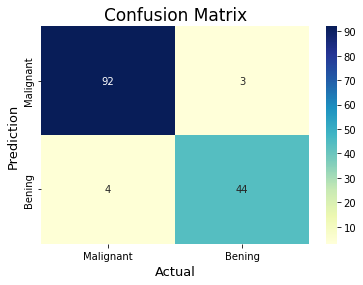

In [72]:
RF_cm = confusion_matrix(y_test1, RF_predictions)

sns.heatmap(RF_cm,
            annot=True,
            fmt='g',
            xticklabels=['Malignant','Bening'],
            yticklabels=['Malignant','Bening'],
            cmap='YlGnBu')

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#### Precision & Recall & F1_score

In [95]:
print(classification_report(y_test1, RF_predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        95
           1       0.94      0.92      0.93        48

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.94       143
weighted avg       0.95      0.95      0.95       143



#### ROC Curve

In [74]:
def plot_roc_curve(fpr, tpr):
    
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve', 
              fontdict={
                  'fontweight':'bold',
                  'fontsize':16
              })
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate (Recall)', fontsize=15)
    plt.grid(True)

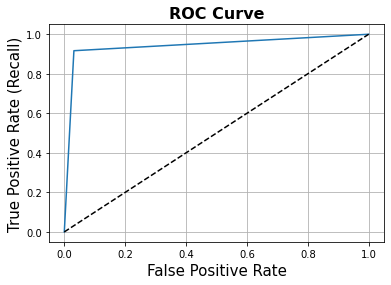

In [75]:
RF_fpr, RF_tpr, RF_thresholds = roc_curve(y_test1, RF_predictions)

plot_roc_curve(RF_fpr, RF_tpr)
plt.show()

#### AUC

In [76]:
RF_AUC = auc(RF_fpr, RF_tpr)
print(f'AUC value: {round(RF_AUC, 2)}')

AUC value: 0.94


### SVM Classifier

In [77]:
SVM_classifier = RandomForestClassifier()

## RFECV to select the number of features
svm_rfecv = RFECV(estimator=SVM_classifier, cv=5, scoring='accuracy')
svm_rfecv = svm_rfecv.fit(x_train, y_train)

print('Optimal number of features :', svm_rfecv.n_features_)
print('Best features :', x_train.columns[svm_rfecv.support_])

Optimal number of features : 9
Best features : Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'concavity_se', 'fractal_dimension_se', 'smoothness_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [78]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(scaled_data[x_train.columns[svm_rfecv.support_]], y, test_size=0.25)

print(f'Number of training examples: {x_train2.shape[0]}')
print(f'Number of testing examples: {x_test2.shape[0]}')
print(f'x_train shape: {x_train2.shape}')
print(f'y_train shape: {y_train2.shape}')
print(f'x_test shape: {x_test2.shape}')
print(f'y_test shape: {y_test2.shape}')

Number of training examples: 426
Number of testing examples: 143
x_train shape: (426, 9)
y_train shape: (426,)
x_test shape: (143, 9)
y_test shape: (143,)


In [79]:
SVM_classifier = SVM_classifier.fit(x_train2, y_train2)

In [80]:
SVM_predictions = SVM_classifier.predict(x_test2)

#### Confusion Matrix

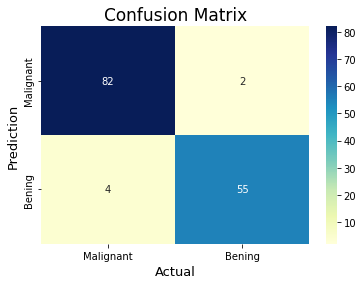

In [81]:
SVM_cm = confusion_matrix(y_test2, SVM_predictions)

sns.heatmap(SVM_cm,
            annot=True,
            fmt='g',
            xticklabels=['Malignant','Bening'],
            yticklabels=['Malignant','Bening'],
            cmap='YlGnBu')

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#### Precision & Recall & F1_score

In [96]:
print(classification_report(y_test2, SVM_predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        84
           1       0.96      0.93      0.95        59

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



#### ROC Curve

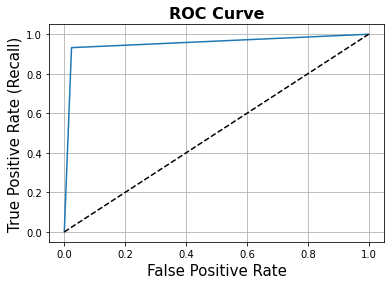

In [83]:
SVM_fpr, SVM_tpr, SVM_thresholds = roc_curve(y_test2, SVM_predictions)

plot_roc_curve(SVM_fpr, SVM_tpr)
plt.show()

#### AUC

In [84]:
SVM_AUC = auc(SVM_fpr, SVM_tpr)
print(f'AUC value: {round(SVM_AUC, 2)}')

AUC value: 0.95


### KNN Classifier

In [85]:
KNN_classifier = RandomForestClassifier()

## RFECV to select the number of features
KNN_rfecv = RFECV(estimator=KNN_classifier, cv=5, scoring='accuracy')
KNN_rfecv = KNN_rfecv.fit(x_train, y_train)

print('Optimal number of features :', KNN_rfecv.n_features_)
print('Best features :', x_train.columns[KNN_rfecv.support_])

Optimal number of features : 9
Best features : Index(['texture_mean', 'area_mean', 'concavity_mean', 'fractal_dimension_mean',
       'area_se', 'concavity_se', 'smoothness_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [86]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(scaled_data[x_train.columns[KNN_rfecv.support_]], y, test_size=0.25)

print(f'Number of training examples: {x_train3.shape[0]}')
print(f'Number of testing examples: {x_test3.shape[0]}')
print(f'x_train shape: {x_train3.shape}')
print(f'y_train shape: {y_train3.shape}')
print(f'x_test shape: {x_test3.shape}')
print(f'y_test shape: {y_test3.shape}')

Number of training examples: 426
Number of testing examples: 143
x_train shape: (426, 9)
y_train shape: (426,)
x_test shape: (143, 9)
y_test shape: (143,)


In [87]:
KNN_classifier = KNN_classifier.fit(x_train3, y_train3)

In [88]:
KNN_predictions = KNN_classifier.predict(x_test3)

#### Confusion Matrix

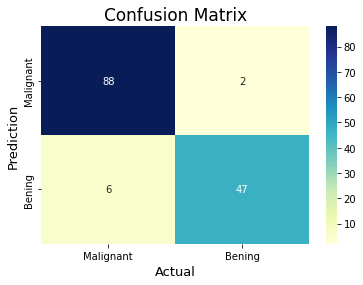

In [89]:
KNN_cm = confusion_matrix(y_test3, KNN_predictions)

sns.heatmap(KNN_cm,
            annot=True,
            fmt='g',
            xticklabels=['Malignant','Bening'],
            yticklabels=['Malignant','Bening'],
            cmap='YlGnBu')

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#### Precision & Recall & F1_score

In [97]:
print(classification_report(y_test3, KNN_predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        90
           1       0.96      0.89      0.92        53

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



#### ROC Curve

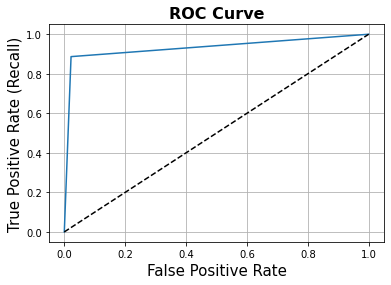

In [91]:
KNN_fpr, KNN_tpr, KNN_thresholds = roc_curve(y_test3, KNN_predictions)

plot_roc_curve(KNN_fpr, KNN_tpr)
plt.show()

#### AUC

In [92]:
KNN_AUC = auc(KNN_fpr, KNN_tpr)
print(f'AUC value: {round(KNN_AUC, 2)}')

AUC value: 0.93
